<a href="https://colab.research.google.com/github/natthaphon-wr/cpe393-codingAI/blob/main/Lab5_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab5 - Training Deep Neural Network
- Natthaphon Rotechanathamcharoen 62070501019

Name your file to 62_1019.ipynb

## Lab Instruction 

In this lab, you will learn how to train a deep fully-connected neural network with Keras and Tensorflow. MNIST data, a Keras built-in dataset, will be used.

See http://yann.lecun.com/exdb/mnist

**Note:**
Before initiating on any machine learning/deep learning project, consider the following:
1. What is your problem and what data do you have?
- What kind of issue do you want to solve? 
- What data do you have? 
- What are you trying to predict? 
- Is there enough information in your data for your model to predict the expected output?

2. How do you measure success?
- What do you mean by "good model performance"? How do you know if your model is ready for deployment?
- Accuracy? What about precision and recall? AUC? ROC?

3. What is your method of evaluation?
- Holding method? CV? Iterate CV?

4. How should your data be preprocessed before being fed into a model?

5. What is your baseline? What is a model structure? How does your last layer look? What is the loss function? What is the optimization function? 

6. Develop an overfit model to determine the size of the model required by 
<br> 6.1 Add more layers
<br> 6.2 Increase the number of neurons
<br> 6.3 Train more epochs

7. Fine-tune your model to achieve a balance of underfit and overfit performance (optimization vs generalization)


**Exploding Gradients :**

Exploding gradients can produce an unstable network that, at best, cannot learn from the training data and, at worst, produces NaN weight values that cannot be updated.

Ref : : https://machinelearningmastery.com/exploding-gradients-in-neural-networks/?fbclid=IwAR1DOg3pD0RSaxpHMZEEtIqxeCDMsvwkf-OxMb7HL5eK7_qLc4uLNEYcJus



First, import all necessary libraries to this project.

In [ ]:
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import models
from keras import layers

### 1. Load MNIST data

In [ ]:
from keras.datasets import mnist

### Load Data ###
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#################

Learn more about the data. For example:
- The distribution of target classes. 
- The characteristic of the input data. How does it look like? 
- etc.

In [ ]:
# Data type
print('Feature type: %s'%type(train_images))
print('Label type: %s'%type(train_labels))

# Data shape
print('Train_set Feature shape: %s'%str(train_images.shape))
print('Train_set Label type: %s'%str(train_labels.shape))
print('Test_set Feature shape: %s'%str(test_images.shape))
print('Test_set Label type: %s'%str(test_labels.shape))

Feature type: <class 'numpy.ndarray'>
Label type: <class 'numpy.ndarray'>
Train_set Feature shape: (60000, 28, 28)
Train_set Label type: (60000,)
Test_set Feature shape: (10000, 28, 28)
Test_set Label type: (10000,)


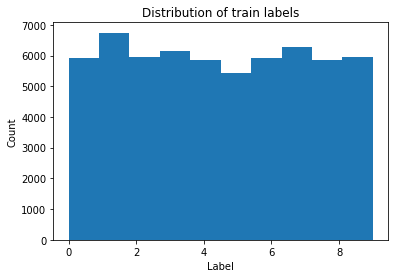

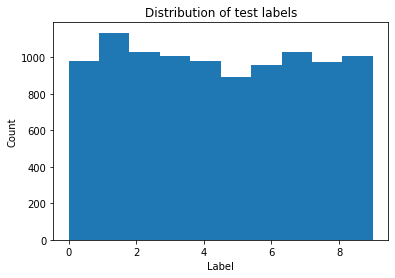

In [ ]:
# Distribution of data

# train data
plt.figure()
plt.hist(train_labels, bins=10)
plt.title("Distribution of train labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# test data
plt.figure()
plt.hist(test_labels, bins=10)
plt.title("Distribution of test labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

5

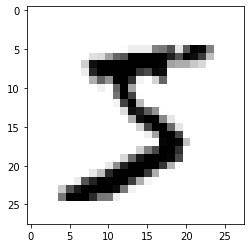

In [ ]:
# Images Data Example
plt.imshow(train_images[0], cmap=plt.cm.binary)
train_labels[0]

### 2. Preprocess a data

In [ ]:
# Reshape data from 2D to 1D
train_images = train_images.reshape(60000, 28*28)
test_images = test_images.reshape(10000, 28*28)
print('Train_set Feature shape: %s'%str(train_images.shape))
print('Test_set Feature shape: %s'%str(test_images.shape))

Train_set Feature shape: (60000, 784)
Test_set Feature shape: (10000, 784)


In [ ]:
# Normalize the value to be between 0 and 1
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255
print('Minimum value of the image: ', train_images.min())
print('Maximum value of the image: ', train_images.max())

Minimum value of the image:  0.0
Maximum value of the image:  1.0


In [ ]:
# One-hot the target data
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Example label after
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### 3. Build a model 

Build a five-fully connected hidden layers with 128 neurons each, *elu* as an activation function, and *he initialier* as a weight initialier function using `Sequential()`.
 
The output is a probability for each target class using *softmax* as an activation function. We will use the *Adam optimizer* with the *cross-entropy loss function*.

In [ ]:
from keras import models
from keras import layers

In [ ]:
network = models.Sequential()

# Add 5 fully connected hidden layers with 128 neurons
network.add(layers.Dense(128, activation='elu', kernel_initializer='he_normal', input_shape=(28*28,)))
network.add(layers.Dense(128, activation='elu', kernel_initializer='he_normal'))
network.add(layers.Dense(128, activation='elu', kernel_initializer='he_normal'))
network.add(layers.Dense(128, activation='elu', kernel_initializer='he_normal'))
network.add(layers.Dense(128, activation='elu', kernel_initializer='he_normal'))

# Add output layer for multiple classification, so the Softmax act. is used
network.add(layers.Dense(10, activation='softmax'))

In [ ]:
network.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 167,818
Trainable params: 167,818
Non-trai

### 4. Train the model

We will train the model with 10 epochs and a batch size of 128.

To avoid information leakage to the test set, which would lead to overfitting, we will divide the data into three sets: train, test, and validation. Hence, we will divide the training data into 90% train set and 10% validation set.

Because the keras `validation_split` argument split the last 10% of data to be validation set, the target class may not be evenly distributed in validation set. As a result, we must use sklearn's `train_test_split` function to divide the data into train and validation sets.

Hint: Use the parameter `stratify = y` in `train_test_split()`
See http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

### Split data ###
train_x, validate_x, train_y, validate_y = train_test_split(train_images, train_labels, test_size=0.1, stratify=train_labels)
print('train_x Feature shape: %s'%str(train_x.shape))
print('validate_x Feature shape: %s'%str(validate_x.shape))
##################

train_x Feature shape: (54000, 784)
validate_x Feature shape: (6000, 784)


stratify using for seperate train test with same distribution

In [ ]:
### Fit the model ###
history = network.fit(train_x, train_y, batch_size=128, epochs=10, validation_data=(validate_x, validate_y))
#####################

Epoch 1/10
422/422 [==============================] - 3s 4ms/step - loss: 0.2623 - accuracy: 0.9181 - val_loss: 0.1599 - val_accuracy: 0.9538
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.1163 - accuracy: 0.9639 - val_loss: 0.1173 - val_accuracy: 0.9645
Epoch 3/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0848 - accuracy: 0.9732 - val_loss: 0.1086 - val_accuracy: 0.9677
Epoch 4/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0657 - accuracy: 0.9794 - val_loss: 0.1146 - val_accuracy: 0.9668
Epoch 5/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0545 - accuracy: 0.9822 - val_loss: 0.1270 - val_accuracy: 0.9655
Epoch 6/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0476 - accuracy: 0.9841 - val_loss: 0.0909 - val_accuracy: 0.9740
Epoch 7/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0377 - accuracy: 0.9879 - val_loss: 0.0980 - val_accuracy: 0.9745
Epoch 

### 5. Evalute the model

Consider the metric you want to use to evaluate/measure the performance of your model in order to answer the following questions:
- Is the model overfit or underfit?
- At what epoch/iteration does it converge or does the model overfit?
- How does the model perform across all data classes? What is your model's overall performance?

In [ ]:
%matplotlib inline

In [ ]:
# The function argument is the model's history during the training process.
def plot_loss_fn(history, rangeFrom=0, rangeTo=None):
  if (rangeTo == None):
    rangeTo = len(history.history['loss'])

  loss = history.history['loss'][rangeFrom:rangeTo]
  val_loss = history.history['val_loss'][rangeFrom:rangeTo]

  epochs = range(rangeFrom + 1, rangeTo + 1)

  plt.plot(epochs, loss, 'g', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
    
def plot_acc_fn(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'g', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

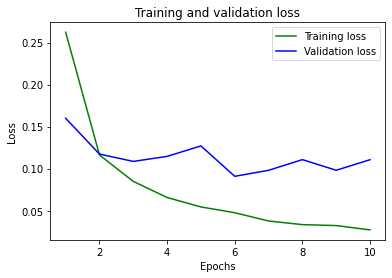

In [ ]:
plot_loss_fn(history)

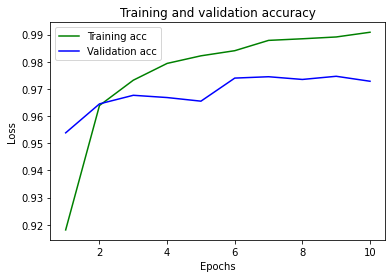

In [ ]:
plot_acc_fn(history)

In [ ]:
### Evaluate the model ###
train_loss, train_acc = network.evaluate(train_images, train_labels)
print('Train Loss: %s\nTrain Accuracy: %s' % (train_loss, train_acc))

test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss, test_acc))

##########################

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0390 - accuracy: 0.9879
Train Loss: 0.03900822624564171
Train Accuracy: 0.9878833293914795
313/313 [==============================] - 1s 2ms/step - loss: 0.1064 - accuracy: 0.9707
Test Loss: 0.1063770055770874
Test Accuracy: 0.9707000255584717


In [ ]:
# predict the data from test images
y_pred = network.predict(test_images)     # predicting the data
y_pred_labels = np.argmax(y_pred, axis=1) # convert predicted output to label
y_actual = np.argmax(test_labels, axis=1) # convert one-hot to a single label

Classification Report
              precision    recall  f1-score   support

           0     0.9828    0.9908    0.9868       980
           1     0.9911    0.9815    0.9863      1135
           2     0.9727    0.9680    0.9704      1032
           3     0.9714    0.9743    0.9728      1010
           4     0.9894    0.9542    0.9715       982
           5     0.9665    0.9697    0.9681       892
           6     0.9652    0.9843    0.9747       958
           7     0.9869    0.9514    0.9688      1028
           8     0.9115    0.9836    0.9462       974
           9     0.9706    0.9495    0.9599      1009

    accuracy                         0.9707     10000
   macro avg     0.9708    0.9707    0.9705     10000
weighted avg     0.9713    0.9707    0.9708     10000



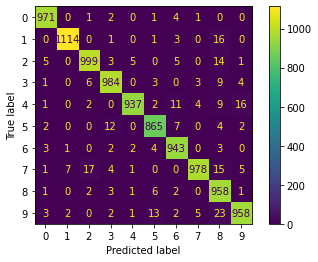

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# classification report
print('Classification Report')
print(classification_report(y_actual, y_pred_labels, digits=4))

# confusion matrix
displayer = ConfusionMatrixDisplay(confusion_matrix(y_actual, y_pred_labels))
displayer.plot()

####Answer and Discussion
From 2 graphs of train and validation, model is slightly overfit at approximately 9th epoch (maybe not overfit). Moreover, train accuracy is slightly more than test accuracy. Overall performance of this model is good. Accuracy,  precison, recall, and f1-score of test set are above 0.95. 


### 6. Tune the model 

Try to tune your model by: 
1. Try increasing the number of epochs to see how it affects your model? Does the results improve or become overfit?
2. Apply an early stop. What do you get as a result? (See also https://chrisalbon.com/deep_learning/keras/neural_network_early_stopping/)
4. Try adding regularizers l1 or l2 (or simutaneus l1, l2) to your model. How does it affect your model?
5. Try adding dropout (any dropout rate) with every layer. What effect does it have on your model? Does it help in the reduction of overfit?

*In the discussion section, discuss the result of these steps*

After completing the preceding steps, **try to achieve the highest precision** by tuning the model using what you have already learned in class. You can experiment with changing the model's structure by increasing or decreasing the number of layers and neuron nodes in each layer. (Use only fully-connected layers for now; no other types of layers!)

**The MNIST model's current highest precision is around 99.8%** (Just try as hard as you can; don't be concerned if you don't achieve this level of precision.)

**In each tuning step, write down what you're doing and why**

####Tuning model that determined  








In [ ]:
### New Model: Add L2 (square) Regularizers and Dropout ###

from tensorflow.keras import regularizers

network2 = models.Sequential()

# Add 5 fully connected hidden layers with 128 neurons
network2.add(layers.Dropout(0.2, input_shape=(28*28,)))
network2.add(layers.Dense(128, activation='elu', kernel_initializer='he_normal', kernel_regularizer=regularizers.L2(0.01)))
network2.add(layers.Dropout(0.2))
network2.add(layers.Dense(128, activation='elu', kernel_initializer='he_normal', kernel_regularizer=regularizers.L2(0.01)))
network2.add(layers.Dropout(0.2))
network2.add(layers.Dense(128, activation='elu', kernel_initializer='he_normal', kernel_regularizer=regularizers.L2(0.01)))
network2.add(layers.Dropout(0.2))
network2.add(layers.Dense(128, activation='elu', kernel_initializer='he_normal', kernel_regularizer=regularizers.L2(0.01)))
network2.add(layers.Dropout(0.2))
network2.add(layers.Dense(128, activation='elu', kernel_initializer='he_normal', kernel_regularizer=regularizers.L2(0.01)))

# Add output layer for multiple classification, so the Softmax act. is used
network2.add(layers.Dropout(0.2))
network2.add(layers.Dense(10, activation='softmax'))

In [ ]:
# compile model

network2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
network2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)              

In [ ]:
# call back functions for early stopping

from keras.callbacks import EarlyStopping, ModelCheckpoint
#callbacks = [EarlyStopping(monitor='val_loss', patience=2), ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]


In [ ]:
# fit model
history2 = network2.fit(train_x, train_y, 
                      batch_size=128,      
                      validation_data=(validate_x, validate_y), 
                      epochs=50,            # increase number of epochs
                      callbacks=callbacks   # early stop
                      )

Epoch 1/50
422/422 [==============================] - 3s 5ms/step - loss: 5.0201 - accuracy: 0.8064 - val_loss: 1.2768 - val_accuracy: 0.8965
Epoch 2/50
422/422 [==============================] - 2s 4ms/step - loss: 1.0335 - accuracy: 0.8606 - val_loss: 0.8201 - val_accuracy: 0.8905
Epoch 3/50
422/422 [==============================] - 2s 4ms/step - loss: 0.8842 - accuracy: 0.8638 - val_loss: 0.7722 - val_accuracy: 0.8977
Epoch 4/50
422/422 [==============================] - 2s 4ms/step - loss: 0.8518 - accuracy: 0.8679 - val_loss: 0.7355 - val_accuracy: 0.9033
Epoch 5/50
422/422 [==============================] - 2s 4ms/step - loss: 0.8327 - accuracy: 0.8683 - val_loss: 0.7271 - val_accuracy: 0.9068
Epoch 6/50
422/422 [==============================] - 2s 4ms/step - loss: 0.8138 - accuracy: 0.8719 - val_loss: 0.6968 - val_accuracy: 0.9157
Epoch 7/50
422/422 [==============================] - 2s 5ms/step - loss: 0.7999 - accuracy: 0.8732 - val_loss: 0.6820 - val_accuracy: 0.9080
Epoch 

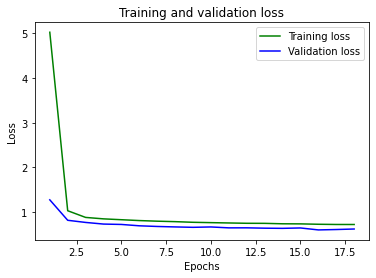

In [ ]:
plot_loss_fn(history2)

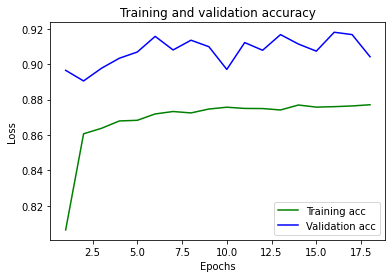

In [ ]:
plot_acc_fn(history2)

In [ ]:
### Evaluate the model ###
train_loss, train_acc = network2.evaluate(train_images, train_labels)
print('Train Loss: %s\nTrain Accuracy: %s' % (train_loss, train_acc))

test_loss, test_acc = network2.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss, test_acc))

##########################

1875/1875 [==============================] - 5s 3ms/step - loss: 0.6279 - accuracy: 0.9049
Train Loss: 0.6278994083404541
Train Accuracy: 0.9048833250999451
313/313 [==============================] - 1s 3ms/step - loss: 0.6206 - accuracy: 0.9051
Test Loss: 0.6205673813819885
Test Accuracy: 0.9050999879837036


After tuning with given methods and parameters, the model is fine, but accuracy and loss are worse than previous model. Increase number of epochs is improve the model. Early stopping, L2 regularization, and dropout can prevent overfitting. However, they could decrease performance of model, so balancing is the necessary concerned.


####Try to achieve the highest precision 

In [ ]:
def plot_prec_fn(history, noPrec=None):
    if (noPrec == None):
        noPrec = 'precision'

    valprec = 'val_' + noPrec

    prec = history.history[noPrec]
    val_prec = history.history[valprec]
    
    epochs = range(1, len(prec) + 1)

    plt.plot(epochs, prec, 'g', label='Training prec')
    plt.plot(epochs, val_prec, 'b', label='Validation prec')
    plt.title('Training and validation precision')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.legend()

#####1. Same / Metrtic is precision / No avoiding overfitting to see performance and overfitting

In [ ]:
### New Model ###
networkTune = models.Sequential()

# Add 5 fully connected hidden layers with 128 neurons
networkTune.add(layers.Dense(128, activation='elu', kernel_initializer='he_normal', input_shape=(28*28,)))
networkTune.add(layers.Dense(128, activation='elu', kernel_initializer='he_normal'))
networkTune.add(layers.Dense(128, activation='elu', kernel_initializer='he_normal'))
networkTune.add(layers.Dense(128, activation='elu', kernel_initializer='he_normal'))
networkTune.add(layers.Dense(128, activation='elu', kernel_initializer='he_normal'))

# Add output layer for multiple classification, so the Softmax act. is used
networkTune.add(layers.Dense(10, activation='softmax'))

In [ ]:
import tensorflow as tf

networkTune.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=[tf.keras.metrics.Precision()])

In [ ]:
### Fit the model ###
historyTune = networkTune.fit(train_x, train_y, batch_size=128, epochs=30, validation_data=(validate_x, validate_y))

Epoch 1/30
422/422 [==============================] - 2s 5ms/step - loss: 0.2582 - precision: 0.9455 - val_loss: 0.1427 - val_precision: 0.9653
Epoch 2/30
422/422 [==============================] - 2s 4ms/step - loss: 0.1172 - precision: 0.9685 - val_loss: 0.1078 - val_precision: 0.9720
Epoch 3/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0835 - precision: 0.9774 - val_loss: 0.0897 - val_precision: 0.9749
Epoch 4/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0659 - precision: 0.9805 - val_loss: 0.0853 - val_precision: 0.9762
Epoch 5/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0520 - precision: 0.9843 - val_loss: 0.0965 - val_precision: 0.9768
Epoch 6/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0489 - precision: 0.9855 - val_loss: 0.1059 - val_precision: 0.9722
Epoch 7/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0386 - precision: 0.9885 - val_loss: 0.0884 - val_precision:

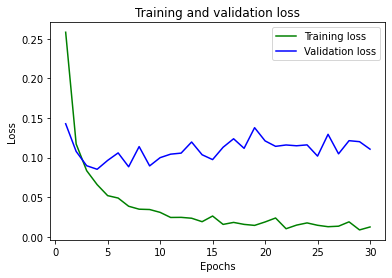

In [ ]:
plot_loss_fn(historyTune)

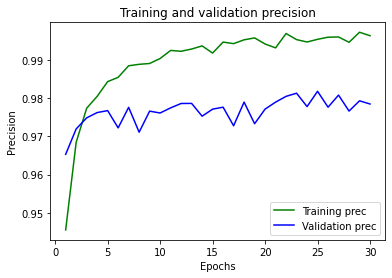

In [ ]:
plot_prec_fn(historyTune)

It's showed slightly overfitting. After approximate 15 epochs, performance of validation set is not improve much.

#####2. Change train and validation to 80:20 / Using early stopping for avoiding overfitting
THEN increase patient of early stopping (2 to 5)

In [ ]:
from sklearn.model_selection import train_test_split

### Split data ###
train_x, validate_x, train_y, validate_y = train_test_split(train_images, train_labels, test_size=0.2, stratify=train_labels)
print('train_x Feature shape: %s'%str(train_x.shape))
print('validate_x Feature shape: %s'%str(validate_x.shape))
##################

train_x Feature shape: (48000, 784)
validate_x Feature shape: (12000, 784)


In [ ]:
### New Model ###
networkTune = models.Sequential()

# Add 5 fully connected hidden layers with 128 neurons
networkTune.add(layers.Dense(128, activation='elu', kernel_initializer='he_normal', input_shape=(28*28,)))
networkTune.add(layers.Dense(128, activation='elu', kernel_initializer='he_normal'))
networkTune.add(layers.Dense(128, activation='elu', kernel_initializer='he_normal'))
networkTune.add(layers.Dense(128, activation='elu', kernel_initializer='he_normal'))
networkTune.add(layers.Dense(128, activation='elu', kernel_initializer='he_normal'))

# Add output layer for multiple classification, so the Softmax act. is used
networkTune.add(layers.Dense(10, activation='softmax'))

In [ ]:
networkTune.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=[tf.keras.metrics.Precision()])

In [ ]:
# call back functions for early stopping
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor='val_loss', patience=5)]

In [ ]:
### Fit the model ###
historyTune = networkTune.fit(train_x, train_y, 
                              batch_size=128, 
                              epochs=30, 
                              validation_data=(validate_x, validate_y), 
                              callbacks=callbacks)

Epoch 1/30
375/375 [==============================] - 2s 5ms/step - loss: 0.2770 - precision_1: 0.9423 - val_loss: 0.1593 - val_precision_1: 0.9583
Epoch 2/30
375/375 [==============================] - 2s 4ms/step - loss: 0.1219 - precision_1: 0.9674 - val_loss: 0.1418 - val_precision_1: 0.9599
Epoch 3/30
375/375 [==============================] - 2s 4ms/step - loss: 0.0880 - precision_1: 0.9754 - val_loss: 0.1556 - val_precision_1: 0.9586
Epoch 4/30
375/375 [==============================] - 2s 4ms/step - loss: 0.0667 - precision_1: 0.9807 - val_loss: 0.1034 - val_precision_1: 0.9733
Epoch 5/30
375/375 [==============================] - 2s 4ms/step - loss: 0.0533 - precision_1: 0.9839 - val_loss: 0.1079 - val_precision_1: 0.9715
Epoch 6/30
375/375 [==============================] - 2s 4ms/step - loss: 0.0467 - precision_1: 0.9860 - val_loss: 0.1140 - val_precision_1: 0.9714
Epoch 7/30
375/375 [==============================] - 2s 4ms/step - loss: 0.0355 - precision_1: 0.9889 - val_los

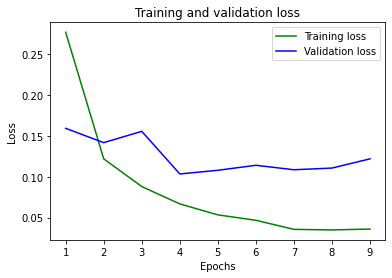

In [ ]:
plot_loss_fn(historyTune)

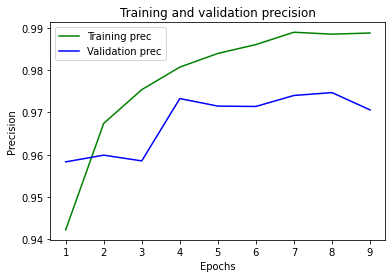

In [ ]:
plot_prec_fn(historyTune, 'precision_1')

After using early stopping with patience equal 2, it's showed that performance of model didn't improve much while increasing number of epochs. Then changing patience to 5, the model is better.

### 7. Final Evaluation

After you've determined that your model is good enough to be deployed in an application, it's time to evaluate it with a test set to ensure that it generalizes well and does not overfit to the validation set.

In [ ]:
# predict the data from test images
y_pred = networkTune.predict(test_images) # predicting the data
y_pred_labels = np.argmax(y_pred, axis=1) # convert predicted output to label
y_actual = np.argmax(test_labels, axis=1) # convert one-hot to a single label

Classification Report
              precision    recall  f1-score   support

           0     0.9847    0.9857    0.9852       980
           1     0.9938    0.9903    0.9921      1135
           2     0.9625    0.9690    0.9657      1032
           3     0.9462    0.9752    0.9605      1010
           4     0.9785    0.9735    0.9760       982
           5     0.9327    0.9787    0.9551       892
           6     0.9768    0.9666    0.9717       958
           7     0.9850    0.9582    0.9714      1028
           8     0.9704    0.9425    0.9563       974
           9     0.9700    0.9623    0.9662      1009

    accuracy                         0.9704     10000
   macro avg     0.9701    0.9702    0.9700     10000
weighted avg     0.9707    0.9704    0.9704     10000



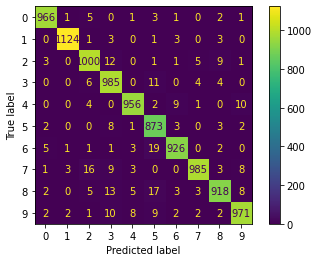

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# classification report
print('Classification Report')
print(classification_report(y_actual, y_pred_labels, digits=4))

# confusion matrix
displayer = ConfusionMatrixDisplay(confusion_matrix(y_actual, y_pred_labels))
displayer.plot()

### Result & Discussion 

- Summarize the main findings from this lab. Discuss what you did, what you got as a result, and why (support your reason)

The main lesson from this lab is knowing methods and parameters for tuning model. While objective of model is increasing performance such as accuracy, overfitting is the necessary concerned. There are simple and complex methods that can deal with issue. The example are

*   Seperating train, test, and validation set for underfitting and overfitting
*   Number of epochs can improve model, but can cause overfitting too.
*   Early stopping is the simple methods for avoiding overfitting, but the problem is "What's the right time to stop?, What's the condition?".
*   Weight regularization (L1,L2) is the interested method that add penalty to loss function. However, I don't know much about using it. "What kind of problems are suitable for weight regularization?" "What's difference of result when using various instance (L1, L2, L1L2)?"
*   Dropout is the direct method to avoid overfitting, but there are lots questions of how to use it. "What's ratio to dropout?" "How many layer and which layers to apply dropout?"

In trying tunning section, I consequently tuning with parameters and methods that I known and can expected the outcome. After trying some, the final model is good enough and accepted. It's not likely overfitting. Precision of validation set and test set are above 0.97. 









### 8. Play with your model

1. Create a 28x28 pixel (any resolution) drawing in any drawing application (for example, Paint or Adobe Photoshop) with a black (#000000) background and white (#FFFFFF) paint.

2. Draw three distinct single digit numbers from 0 to 9. The images should then be saved in PNG format.

3. Install open-cv by
    <br/>for local pc :
 (See https://pypi.org/project/opencv-python)  
> `pip install opencv-python` <br/> or conda (See https://anaconda.org/conda-forge/opencv)

    for colab use:
```import cv2 as cv```

4. Load your images to this IPython using the ```imread()``` function
5. Preprocess the images in the same way you did during the development process.
6. Feed your images to your best model.

What class does your model predict? Is it correct? If not, why does it still get a wrong result when your model is more than 90% accurate?

### Challenges: Play with initializer

- Build a two-layer neural network with any hyperparameter
- Use or create a weight initializer function that sets all the weights to one. See: https://keras.io/initializers/
- Discuss the results. What happened? and why?

In [ ]:
### New Model ###
network2L = models.Sequential()

network2L.add(layers.Dense(128, activation='elu', kernel_initializer='ones', bias_initializer='ones', input_shape=(28*28,)))
network2L.add(layers.Dense(10, activation='softmax'))

network2L.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               100480    
                                                                 
 dense_25 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network2L.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history2L = network2L.fit(train_x, train_y, 
                              batch_size=128, 
                              epochs=10, 
                              validation_data=(validate_x, validate_y), 
                              )

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 5.2797 - accuracy: 0.7329 - val_loss: 0.6282 - val_accuracy: 0.7918
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4234 - accuracy: 0.8743 - val_loss: 0.4753 - val_accuracy: 0.8595
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4090 - accuracy: 0.8810 - val_loss: 0.4025 - val_accuracy: 0.8806
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4536 - accuracy: 0.8727 - val_loss: 0.4247 - val_accuracy: 0.8771
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4836 - accuracy: 0.8716 - val_loss: 0.3571 - val_accuracy: 0.9057
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4382 - accuracy: 0.8839 - val_loss: 0.3776 - val_accuracy: 0.9007
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4657 - accuracy: 0.8826 - val_loss: 0.5055 - val_accuracy: 0.8655
Epoch 

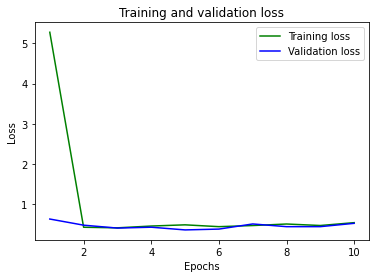

In [ ]:
plot_loss_fn(history2L)

If setting all weightes to one, each unit will get signal equal to sum of inputs. All units in hidden layer are the same, so there is conflict about concept of neural network that different units are distinct characteristic and will determine the result. 